# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [461]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk

# Create two new dataframes
north_df=pd.read_csv("NorthCallCenter.csv")
south_df=pd.read_csv("SouthCallCenter.csv")


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

In [462]:
north_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


In [463]:
south_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [464]:
#Code Used:
north_df['Rep ID'].nunique()

9

#### EDA Question 1B:  How many reps are in the South branch?  

In [465]:
#Code Used:
south_df['Rep ID'].nunique()

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [466]:
#Code Used:
north_df[['Busy Minutes','Not Ready Minutes','Incoming Wait Time','During Call Wait Time']].mean()

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [467]:
#Code Used:
south_df[['Busy Minutes','Not Ready Minutes','Incoming Wait Time','During Call Wait Time']].mean()

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [468]:
# Code Used:
Call_center_combined=pd.concat([north_df,south_df])
Call_center_combined.groupby('Time Block')['Calls'].sum()

Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: There is not a missing data on most of the columns othern than Incoming Wait time. I have not dropped this as we use it further in the analysis. But I have ignored the null records using notnull function when calculating service percentage.

In [469]:
# Code Used
# Add Additional Cells as needed.
north_df.isna().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

In [470]:
south_df.isna().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: There are 2 seperate "YES" as there is an extra space in one of the string values.We can use strip function to remove the space 


In [471]:
north_df['Sale'].unique()


array(['NO', 'YES ', 'YES'], dtype=object)

In [472]:
north_df['Sale'] =north_df['Sale'].str.strip()
north_df['Sale'].unique()

array(['NO', 'YES'], dtype=object)

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: There was no duplicate datas in both dataframes. In case if there was, we have to dropduplicates. In this case it was not necessary

In [473]:
#Code Used
# Add Additional Cells as needed.

north_duplicates=north_df[north_df.duplicated()]
north_duplicates

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


In [474]:
south_duplicates=south_df[south_df.duplicated()]
south_duplicates

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: The data was clean and I did not find any data to be unnecessary

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [476]:
# Create dataframe for the entire company named df
df=pd.concat([north_df,south_df])
df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent(37)
- South Branch = Eric(35)


In [477]:
# Code Used
# Add Additional Cells as needed.

df1=df.groupby(['Rep ID'])['Calls'].sum().sort_values(ascending=False).head(2)
df1

Rep ID
Brent    37
Eric     35
Name: Calls, dtype: int64

In [478]:
north_df1=north_df.groupby(['Rep ID'])['Calls'].sum().sort_values(ascending=False).head(2)
north_df1

Rep ID
Brent    37
Lilly    30
Name: Calls, dtype: int64

In [479]:
south_df1=south_df.groupby(['Rep ID'])['Calls'].sum().sort_values(ascending=False).head(2)
south_df1

Rep ID
Eric     35
Randy    33
Name: Calls, dtype: int64

In [480]:
df['Abandoned'].unique()

array([1, 0])

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.85
- South Branch = 1.27
- Company Wide =1.96
- Do any of these fall out of the optimal range of 2-5%?- Yes
Company wide has a call abandonment rate of just 1.96 as South branch has a low rate of 1.27. It is performing better with call abandoment when compared to North branch


In [481]:
Total_calls=df['Calls'].sum()
Abandoned_calls=df['Abandoned'].sum()
Average_abandonment_rate=(Abandoned_calls/Total_calls)*100
Average_abandonment_rate

1.9677996422182469

In [482]:
Total_calls_north=north_df['Calls'].sum()
Abandoned_calls_north=north_df['Abandoned'].sum()
Average_abandonment_rate_north=(Abandoned_calls_north/Total_calls_north)*100
Average_abandonment_rate_north

2.857142857142857

In [483]:
Total_calls_south=south_df['Calls'].sum()
Abandoned_calls_south=south_df['Abandoned'].sum()
Average_abandonment_rate_south=(Abandoned_calls_south/Total_calls_south)*100
Average_abandonment_rate_south

1.2738853503184715

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24,Number of calls within 2 seconds:33
- South Branch = 38.10, Number of calls within 2 seconds:48
- Company Wide = 38.94, Number of calls within 2 seconds:81

In [543]:
# Code Used
#Finding calls where wait time within 2 seconds for Combined center
df2=df.where((df['Incoming Wait Time'] <= 2.0))         
wait_lessthan_2=df2['Incoming Wait Time'].count()
Number_ofcalls=df.where(df['Incoming Wait Time'].notnull())['Calls'].count()
Service_level=(wait_lessthan_2/Number_ofcalls)*100
Service_level

38.94230769230769

In [485]:
Number_ofcalls=df['Calls'].count()
Number_ofcalls

559

In [486]:
#Finding calls where wait time is within 2 seconds for North center
N_df2=north_df.where((north_df['Incoming Wait Time'] <= 2.0))
N_wait_within_2=N_df2['Incoming Wait Time'].count()
#Number_ofcalls_north=north_df['Calls'].count()
#Ignoring all NaN values as it changes the overall value
Number_ofcalls_north=north_df.where(north_df['Incoming Wait Time'].notnull())['Calls'].count()
Service_level_north=(N_wait_within_2/Number_ofcalls_north)*100
Service_level_north


40.243902439024396

In [487]:
#Finding calls where wait time is within 2 seconds for South center
S_df2=south_df.where((south_df['Incoming Wait Time'] <= 2.0))

S_wait_within_2=S_df2['Incoming Wait Time'].count()
Number_ofcalls_south=south_df.where(south_df['Incoming Wait Time'].notnull()) ['Calls'].count()
Service_level_south=(S_wait_within_2/Number_ofcalls_south)*100
Service_level_south


38.095238095238095

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.0
- Company Wide in seconds = 3.02


In [488]:
# Code Used - 
Average_speed__ofanswer=df['Incoming Wait Time'].mean()
Average_speed__ofanswer

3.019230769230769

In [489]:
Average_speed__ofanswer_north=north_df['Incoming Wait Time'].mean()
Average_speed__ofanswer_north

3.048780487804878

In [490]:
Average_speed__ofanswer_south=south_df['Incoming Wait Time'].mean()
Average_speed__ofanswer_south

3.0

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I have used Bar chart and this shows a visulization of which queue has the most abandoned calls, and average abandonment rate across the queues.

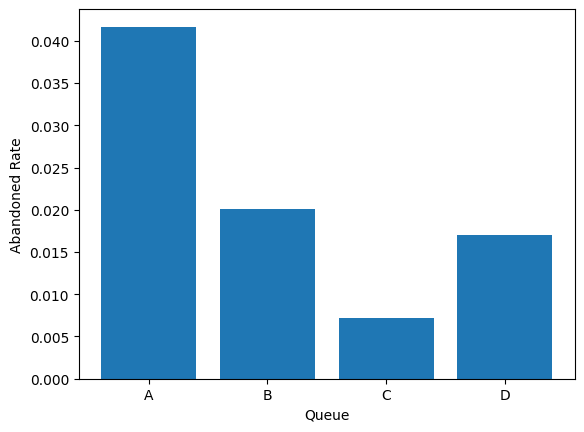

In [491]:
# Create visualization 1 here
# Import any additional libraries needed with alias



# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
abandonment_rates.values()
#Your Code Here:
x=abandonment_rates.values()
y=abandonment_rates.keys()
plt.xlabel("Queue")
plt.ylabel("Abandoned Rate")
plt.bar(y,x)
plt.show()

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why:I chose the grouped horizontal bar char chart so I can visualize how increase in speed of answer has an impact in increase ofservice level percentage.

<AxesSubplot: ylabel='Rep ID'>

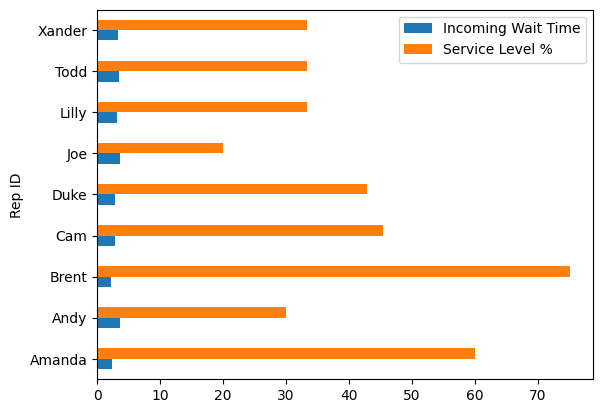

In [556]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

service_level
#Your Code Here:
# x=service_level.index
# y=list(service_level["Service Level %"])
# plt.title("Service level percentage and average speed of answer for each rep in the North Branch")
# plt.xlabel("Service Level %")
# plt.ylabel("Reps")
# plt.barh(x,y)
# plt.show()

#merged_df=pd.merge(north_plt,service_level,on='Rep ID')
#merged_df=merged_df['Rep ID','Incoming Wait Time','Service Level %']

merged_df=pd.merge(north_plt,service_level,on='Rep ID').drop("Calls_x",axis=1).drop("Calls_y",axis=1)
merged_df.plot.barh(x='Rep ID',stacked=False)


#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: I used Stacked bar chart to sharply differentiate incoming and outgoing calls between complaints, Product support and Sales support

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


<AxesSubplot: xlabel='Call Purpose'>

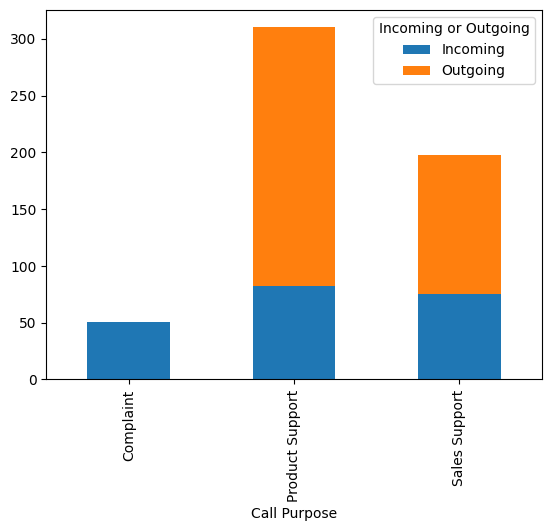

In [555]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
# df3=pd.DataFrame([complaints,sales_support,product_support],index=call_purpose)
# df3
# df3.plot.bar(stacked=True)
# plt.show()
purpose_counts.unstack().plot(kind='bar',stacked=True)


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: 

With the measure of KPI's, both the centers are pretty close to each other in effiency with service level, with north branch slightly better than South .But average speed of answer,  and with average abandonment rate,South Branch is more efficient than half less than North Branch,with more than two times less Average abandonment rate. With all this South Branch is definitely more efficient in operation.

#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: With South having 11 reps and North with 9, North can definitely benefit more reps that can get their average abandonment rate lower and improve their efficiency


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:wait 
> Your Answer:Definitely!The missing data on a important column like Incoming Wait time is crucial as it may skew the overall analysis.
Plus It would have been more helpful if there was information on customer experience score that would also

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [588]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]
call_times
# # Use groupby to plot based on time blocks:
time_block=call_times.groupby(['Call Purpose','Time Block'])['Calls'].sum()
time_block
# # Use groupby and get_group to select which call purpose to plot:


Call Purpose     Time Block
Complaint        10:00 AM       6
                 11:00 AM       3
                 12:00 PM      11
                 1:00 PM        6
                 2:00 PM        5
                 3:00 PM        6
                 4:00 PM        3
                 5:00 PM        6
                 9:00 AM        5
Product Support  10:00 AM      20
                 11:00 AM      26
                 12:00 PM      60
                 1:00 PM       16
                 2:00 PM       50
                 3:00 PM       61
                 4:00 PM       40
                 5:00 PM       32
                 9:00 AM        5
Sales Support    10:00 AM      73
                 11:00 AM      27
                 12:00 PM      49
                 1:00 PM       18
                 2:00 PM       10
                 3:00 PM        6
                 4:00 PM       10
                 5:00 PM        5
Name: Calls, dtype: int64